This is for plotting the load duration curve subject to different load shifting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\8+.csv',index_col=0)

household_data = pd.DataFrame(data)
household_data.index = pd.to_datetime(household_data.index)
household_data['demand']=household_data['demand']*2
# Define different averaging frequencies
frequencies = [0.5,1, 2, 3, 6,12]  #
# frequencies = ['30min','1h', '2h', '3h', '6h','12h']  #

# Plotting setup
plt.figure(figsize=(12, 8))

# Loop through each frequency, resample, sort, filter out zeros, and plot the load duration curve
for freq in frequencies:
    freq_=str(freq*60) + "min"
    # Step 1: Resample the data
    resampled_data = household_data['demand'].resample(freq_).mean()
    
    # Step 2: Filter out zeros
    resampled_data = resampled_data[resampled_data > 0]
    
    # Step 3: Sort the resampled data in descending order to create the load duration curve
    sorted_demand = resampled_data.sort_values(ascending=False).reset_index(drop=True)
    sorted_demand.index = sorted_demand.index * freq
    # Step 4: Plot the curve
    plt.plot(sorted_demand, label=f'{freq} Averaging Window')

# Plot customizations
plt.title('Load Duration Curves for Different Averaging Frequencies (Excluding Zeros)', fontsize=20)
plt.xlabel('Duration (Hours)', fontsize=16)
plt.ylabel('Demand(kW)', fontsize=16)
plt.grid(True)

# Customize ticks and legend with larger font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

This is for plotting the time sequence of HHP consumption

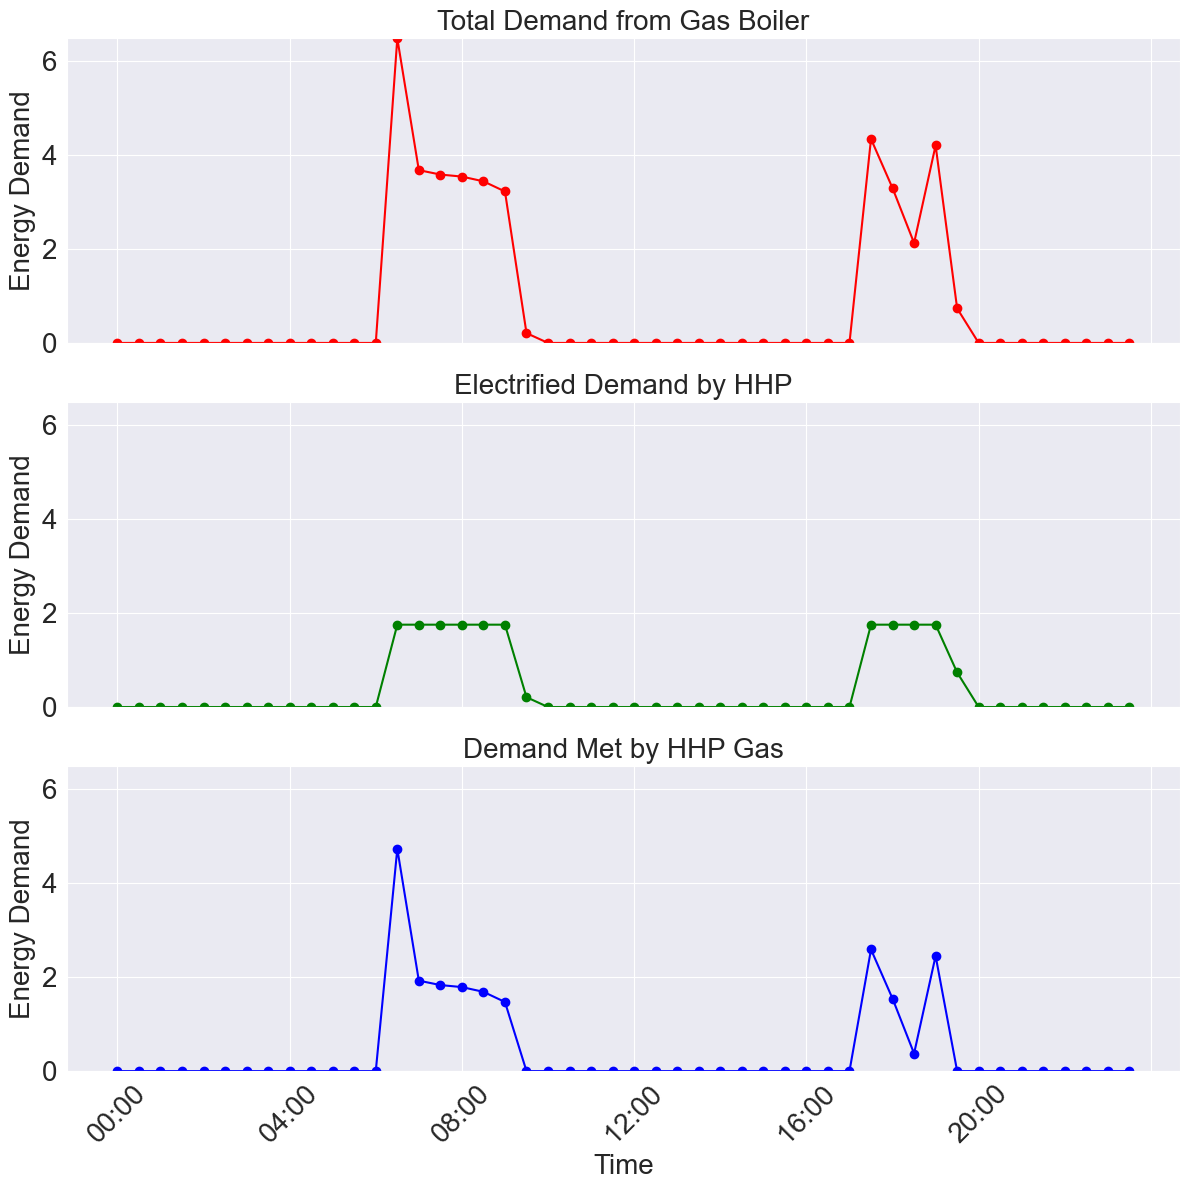

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv(r'D:\2min-resample\MetaDataSeparation\MetaData Filtered\load duration model_WODHW\kW1.75\Plotting.csv', index_col=0)

# Ensure the index is a datetime index

# Determine the y-axis limits based on the data
y_min = min(data[['Gas_Boiler', 'HP_Electricity', 'HP_Gas']].min())
y_max = max(data[['Gas_Boiler', 'HP_Electricity', 'HP_Gas']].max())

# Plotting the data with manually set y-axis limits
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Plot Gas Boiler
axes[0].plot(data.index, data['Gas_Boiler'], marker='o', color='red', label='Gas Boiler')
axes[0].set_title('Total Demand from Gas Boiler', fontsize=20)
axes[0].set_ylabel('Energy Demand', fontsize=20)
axes[0].grid(True)
axes[0].set_ylim(y_min, y_max)

# Plot HP_Electricity
axes[1].plot(data.index, data['HP_Electricity'], marker='o', color='green', label='HP_Electricity')
axes[1].set_title('Electrified Demand by HHP', fontsize=20)
axes[1].set_ylabel('Energy Demand', fontsize=20)
axes[1].grid(True)
axes[1].set_ylim(y_min, y_max)

# Plot HP_Gas
axes[2].plot(data.index, data['HP_Gas'], marker='o', color='blue', label='HP_Gas')
axes[2].set_title('Demand Met by HHP Gas', fontsize=20)
axes[2].set_xlabel('Time', fontsize=20)
axes[2].set_ylabel('Energy Demand', fontsize=20)
axes[2].grid(True)
axes[2].set_ylim(y_min, y_max)

# Customize x-axis with sparser tick labels
locator = plt.MaxNLocator(nbins=8)  # Adjust 'nbins' to control number of ticks
axes[2].xaxis.set_major_locator(locator)

plt.xticks(rotation=45, fontsize=20)

# Increase the y-ticks font size
for ax in axes:
    ax.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()